# Home 3: Build a CNN for image recognition.

### Name: Yao Xiao


## 0. You will do the following:

1. Read, complete, and run my code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
4. Upload this .HTML file to your Github repo.

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583A-2019Spring/blob/master/homework/HM3/cnn.html


## 1. Data preparation

### 1.1. Load data


In [1]:
from keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [2]:
def to_one_hot(y, num_class=10):
    result = np.zeros((len(y), num_class))
    for i,label in enumerate(y):
        result[i,label]=1
    return result
y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [3]:
rand_indices = np.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [4]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [5]:
from keras import optimizers

learning_rate = 1E-5 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

In [6]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 36s 905us/step - loss: 8.2007 - acc: 0.2073 - val_loss: 6.0026 - val_acc: 0.2574
Epoch 2/10
40000/40000 [==============================] - 39s 964us/step - loss: 4.9410 - acc: 0.2873 - val_loss: 3.8768 - val_acc: 0.3012
Epoch 3/10
40000/40000 [==============================] - 39s 970us/step - loss: 3.2000 - acc: 0.3265 - val_loss: 2.9092 - val_acc: 0.3352
Epoch 4/10
40000/40000 [==============================] - 39s 972us/step - loss: 2.5738 - acc: 0.3583 - val_loss: 2.5102 - val_acc: 0.3596
Epoch 5/10
40000/40000 [==============================] - 39s 975us/step - loss: 2.2260 - acc: 0.3864 - val_loss: 2.2198 - val_acc: 0.3835
Epoch 6/10
40000/40000 [==============================] - 39s 982us/step - loss: 1.9925 - acc: 0.4120 - val_loss: 2.0284 - val_acc: 0.4045
Epoch 7/10
40000/40000 [==============================] - 39s 986us/step - loss: 1.8287 - acc: 0.4350 - val_loss: 1.

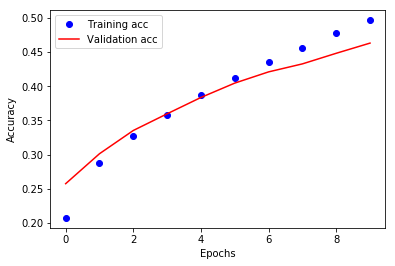

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [28]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.models import Sequential
from keras import layers
model1 = Sequential()
model1.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model1.add(layers.BatchNormalization())
model1.add(Activation('relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), padding='same'))
model1.add(layers.BatchNormalization())
model1.add(Activation('relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), padding='same'))
model1.add(layers.BatchNormalization())
model1.add(Activation('relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512))
model1.add(layers.BatchNormalization())
model1.add(Activation('relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_30 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
activation_30 (Activation)   (None, 16, 16, 64)        0         
__________

In [29]:
from keras import optimizers

learning_rate = 3E-4 # to be tuned!
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=learning_rate), metrics=['acc'])

In [30]:
history = model1.fit(x_train, y_train_vec, batch_size=128, epochs=50)

Epoch 1/50
50000/50000 [==============================] - 132s 3ms/step - loss: 1.4575 - acc: 0.4771
Epoch 2/50
50000/50000 [==============================] - 129s 3ms/step - loss: 1.1073 - acc: 0.6070
Epoch 3/50
50000/50000 [==============================] - 129s 3ms/step - loss: 0.9777 - acc: 0.6540
Epoch 4/50
50000/50000 [==============================] - 127s 3ms/step - loss: 0.8880 - acc: 0.6880
Epoch 5/50
50000/50000 [==============================] - 118s 2ms/step - loss: 0.8225 - acc: 0.7113
Epoch 6/50
50000/50000 [==============================] - 119s 2ms/step - loss: 0.7734 - acc: 0.7268
Epoch 7/50
50000/50000 [==============================] - 129s 3ms/step - loss: 0.7264 - acc: 0.7449
Epoch 8/50
50000/50000 [==============================] - 131s 3ms/step - loss: 0.6924 - acc: 0.7574
Epoch 9/50
50000/50000 [==============================] - 131s 3ms/step - loss: 0.6564 - acc: 0.7680
Epoch 10/50
50000/50000 [==============================] - 130s 3ms/step - loss: 0.6276 - a

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [32]:
loss_and_acc = model1.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 5s 471us/step
loss = 0.6779227051258088
accuracy = 0.8011
